# Explore here

In [73]:
# importing packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import GridSearchCV

from collections import Counter


from pickle import dump

### Importing data

In [74]:
total_data = pd.read_csv('../data/interim/total_clean.csv')
total_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness
0,6,148,72,0,33.6,0.627,50,1,35
1,1,85,66,0,26.6,0.351,31,0,29
2,8,183,64,0,23.3,0.672,32,1,0
3,1,89,66,94,28.1,0.167,21,0,23
4,5,116,74,0,25.6,0.201,30,0,0


### inserting mean for zero values in SkinThickness

In [75]:
sinzeros = total_data[total_data['SkinThickness']!= 0]
media = sinzeros["SkinThickness"].mean()

total_data.loc[total_data['SkinThickness']==0, 'SkinThickness'] = int(media)

print(total_data.describe())


       Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   711.000000  711.000000     711.000000  711.000000  711.000000   
mean      3.831224  121.296765      72.516174   82.876231   32.378590   
std       3.272968   30.353745      12.405108  114.052997    6.816872   
min       0.000000   44.000000      24.000000    0.000000   18.200000   
25%       1.000000   99.000000      64.000000    0.000000   27.450000   
50%       3.000000  117.000000      72.000000   46.000000   32.259059   
75%       6.000000  140.000000      80.000000  130.000000   36.500000   
max      13.000000  199.000000     122.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  SkinThickness  
count                711.000000  711.000000  711.000000      711.00000  
mean                   0.456350   33.251758    0.337553       28.66948  
std                    0.286023   11.660209    0.473208        8.54675  
min                    0.078000   21.000000    0.0

In [76]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness
0,6,148,72,0,33.6,0.627,50,1,35
1,1,85,66,0,26.6,0.351,31,0,29
2,8,183,64,0,23.3,0.672,32,1,28
3,1,89,66,94,28.1,0.167,21,0,23
4,5,116,74,0,25.6,0.201,30,0,28


### oversampling to balance the dataset, and splitting the data into training and testing sets

In [77]:
X = total_data.drop('Outcome', axis=1)
y = total_data['Outcome']

oversample = SMOTE(random_state=21) 
X_res, y_res = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=21)
counter_train = Counter(y_train)
print(counter_train)
print(X_train.head())
print(X_train.shape)
print(X_test.shape)
counter_test = Counter(y_test)
print(counter_test)


Counter({1: 380, 0: 373})
     Pregnancies  Glucose  BloodPressure  Insulin        BMI  \
822            2      104             63       63  26.578304   
277            0      126             84      215  30.700000   
744            2      105             80      189  33.744774   
657            3      102             74        0  29.500000   
394            4      184             78      277  37.000000   

     DiabetesPedigreeFunction  Age  SkinThickness  
822                  0.747520   24             15  
277                  0.520000   24             29  
744                  0.670614   29             43  
657                  0.121000   32             28  
394                  0.264000   31             39  
(753, 8)
(189, 8)
Counter({0: 98, 1: 91})


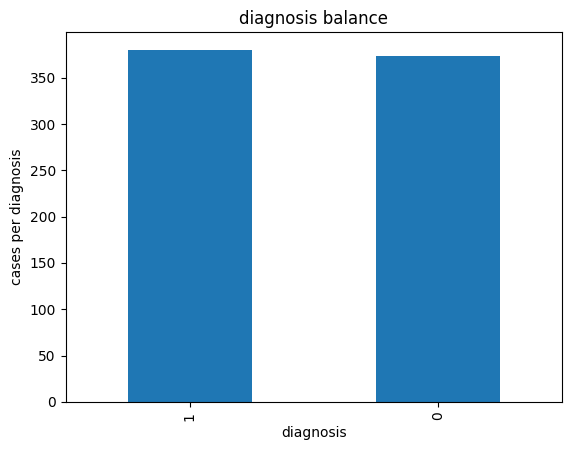

In [78]:
y_train.value_counts().plot(kind='bar')    
plt.title('diagnosis balance')
plt.xlabel('diagnosis')
plt.ylabel('cases per diagnosis')
plt.show()

# Model 1

In [79]:
model = XGBClassifier(random_state=21)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=21, ...)

In [80]:
y_pred = model.predict(X_test)
print(y_pred[:10])

y_pred_train = model.predict(X_train)
print(y_pred_train[:10])

[0 1 1 1 1 0 0 0 1 0]
[1 0 1 0 1 1 0 0 1 0]


#### Evaluating the first base/default model:

In [81]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred_train)

precision_test = precision_score(y_test, y_pred)
precision_train = precision_score(y_train, y_pred_train)

recall_test = recall_score(y_test, y_pred)
recall_train = recall_score(y_train, y_pred_train)

print("Test Score: ")
print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)
print("")
print("Train Score: ")
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

print("")
print("Model 1: ")
print("")
print(classification_report(y_test, y_pred, target_names=["No diabetes", "Diabetes"]))

Test Score: 
Accuracy Test:  0.8148148148148148
F1 score Test:  0.8223350253807107
Precision Test:  0.7641509433962265
Recall Test:  0.8901098901098901

Train Score: 
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0

Model 1: 

              precision    recall  f1-score   support

 No diabetes       0.88      0.74      0.81        98
    Diabetes       0.76      0.89      0.82        91

    accuracy                           0.81       189
   macro avg       0.82      0.82      0.81       189
weighted avg       0.82      0.81      0.81       189



In [82]:
# Saving the model
model.save_model('../models/xgb_classifier_default_21.json')

##### Optimizing model 1

In [83]:
model_base = XGBClassifier()

hyperparameters = {'n_estimators': [5, 10, 15, 30, 50, 100, 500, 1000, 3000], 
                   'learning_rate': [0.01, 0.05, 0.1, 0.25], # rate to accept the model on each boosting iteration (higher = complexity)
                   'objective': ['reg:squarederror', 'reg:squaredlogerror'], # = loss, error function to minimize, difference pred/reality
                   'subsample': [0.5, 0.7, 0.8], # fraction of samples to be used for each tree
                   'max_depth': [6, 8, 10, 12, 14, 16], # max splits each tree can do
                   'gamma': [0, 5, 10, 30, 50, 100, 250, 350], # min samples split (high avoids overfitting)
                   'min_child_weight': [1, 2, 5, 10, 20, 50, 100], # min samples leaf
                   'random_state': [21],
                   'n_jobs': [-1] # -1 means use all processors
                   }

grid = GridSearchCV(model_base, hyperparameters, cv=5, scoring='accuracy', n_jobs=4)

grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best hyperparameters: {grid.best_params_}")

KeyboardInterrupt: 

##### Too many parameters to optimize, will take a long time to find the best combination

In [84]:
model_base = XGBClassifier()

hyperparameters = {'n_estimators': [30, 50, 100, 500, 1000, 3000], 
                   'learning_rate': [0.01], # rate to accept the model on each boosting iteration (higher = complexity)
                   'objective': ['reg:squarederror', 'reg:squaredlogerror'], # = loss, error function to minimize, difference pred/reality
                   'subsample': [0.5], # fraction of samples to be used for each tree
                   'max_depth': [ 8, 12, 16], # max splits each tree can do
                   'gamma': [0, 5, 10, 50, 100], # min samples split (high avoids overfitting)
                   'min_child_weight': [1, 2, 5, 10, 20], # min samples leaf
                   'random_state': [21],
                   'n_jobs': [-1] # -1 means use all processors
                   }

grid = GridSearchCV(model_base, hyperparameters, cv=5, scoring='accuracy', n_jobs=4)

grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 12, 'min_child_weight': 2, 'n_estimators': 500, 'n_jobs': -1, 'objective': 'reg:squarederror', 'random_state': 21, 'subsample': 0.5}


In [85]:
# running the optimized model
model_1_optimized = XGBClassifier(**best_params)
model_1_optimized.fit(X_train, y_train)

y_pred_m1 = model_1_optimized.predict(X_test)
y_pred_train_m1 = model_1_optimized.predict(X_train)

#### Evaluating the optimized model:

In [86]:
accuracy_test = accuracy_score(y_test, y_pred_m1)
accuracy_train = accuracy_score(y_train, y_pred_train_m1)

f1_score_test = f1_score(y_test, y_pred_m1)
f1_score_train = f1_score(y_train, y_pred_train_m1)

precision_test = precision_score(y_test, y_pred_m1)
precision_train = precision_score(y_train, y_pred_train_m1)

recall_test = recall_score(y_test, y_pred_m1)
recall_train = recall_score(y_train, y_pred_train_m1)

print("Test Score: ")
print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)
print("")
print("Train Score: ")
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

print("")
print("Model 1: ")
print("")
print(classification_report(y_test, y_pred_m1, target_names=["No diabetes", "Diabetes"]))

Test Score: 
Accuracy Test:  0.8095238095238095
F1 score Test:  0.8144329896907216
Precision Test:  0.7669902912621359
Recall Test:  0.8681318681318682

Train Score: 
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0

Model 1: 

              precision    recall  f1-score   support

 No diabetes       0.86      0.76      0.80        98
    Diabetes       0.77      0.87      0.81        91

    accuracy                           0.81       189
   macro avg       0.81      0.81      0.81       189
weighted avg       0.82      0.81      0.81       189



### Optimization 2


In [87]:
model_base = XGBClassifier()

hyperparameters = {'n_estimators': [100, 500, 1000, 3000, 5000], 
                   'learning_rate': [0.05], # rate to accept the model on each boosting iteration (higher = complexity)
                   'objective': ['reg:squarederror'], # = loss, error function to minimize, difference pred/reality
                   'subsample': [0.5], # fraction of samples to be used for each tree
                   'max_depth': [10, 12, 14], # max splits each tree can do
                   'gamma': [5, 25, 50, 100], # min samples split (high avoids overfitting)
                   'min_child_weight': [2, 5, 10, 20], # min samples leaf
                   'random_state': [21],
                   'n_jobs': [-1] # -1 means use all processors
                   }

grid = GridSearchCV(model_base, hyperparameters, cv=5, scoring='accuracy', n_jobs=4)

grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best hyperparameters: {grid.best_params_}")

c:\Users\34616\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters: {'gamma': 5, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 5000, 'n_jobs': -1, 'objective': 'reg:squarederror', 'random_state': 21, 'subsample': 0.5}


In [88]:
# running the second optimized model
model_2_optimized = XGBClassifier(**best_params)
model_2_optimized.fit(X_train, y_train)

y_pred_m2 = model_2_optimized.predict(X_test)
y_pred_train_m2 = model_2_optimized.predict(X_train)

##### Evaluating the second optimized model:

In [90]:
accuracy_test = accuracy_score(y_test, y_pred_m2)
accuracy_train = accuracy_score(y_train, y_pred_train_m2)

f1_score_test = f1_score(y_test, y_pred_m2)
f1_score_train = f1_score(y_train, y_pred_train_m2)

precision_test = precision_score(y_test, y_pred_m2)
precision_train = precision_score(y_train, y_pred_train_m2)

recall_test = recall_score(y_test, y_pred_m2)
recall_train = recall_score(y_train, y_pred_train_m2)

print("Test Score: ")
print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)
print("")
print("Train Score: ")
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

print("")
print("Model 1: ")
print("")
print(classification_report(y_test, y_pred_m2))

Test Score: 
Accuracy Test:  0.8201058201058201
F1 score Test:  0.826530612244898
Precision Test:  0.7714285714285715
Recall Test:  0.8901098901098901

Train Score: 
Accuracy Train:  0.7861885790172642
F1 score Train:  0.7927927927927928
Precision Train:  0.7758186397984886
Recall Train:  0.8105263157894737

Model 1: 

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        98
           1       0.77      0.89      0.83        91

    accuracy                           0.82       189
   macro avg       0.83      0.82      0.82       189
weighted avg       0.83      0.82      0.82       189



#### Optimization 3

In [92]:
model_base = XGBClassifier()

hyperparameters = {'n_estimators': [1000, 3000, 5000, 10000], 
                   'learning_rate': [0.01], # rate to accept the model on each boosting iteration (higher = complexity)
                   'objective': ['reg:squarederror'], # = loss, error function to minimize, difference pred/reality
                   'subsample': [0.6], # fraction of samples to be used for each tree
                   'max_depth': [10, 12, 14], # max splits each tree can do
                   'gamma': [2, 5, 10, 50], # min samples split (high avoids overfitting)
                   'min_child_weight': [2, 5, 10, 20], # min samples leaf
                   'random_state': [21],
                   'n_jobs': [-1] # -1 means use all processors
                   }

grid = GridSearchCV(model_base, hyperparameters, cv=5, scoring='accuracy', n_jobs=4)

grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best hyperparameters: {grid.best_params_}")

c:\Users\34616\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters: {'gamma': 2, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 10000, 'n_jobs': -1, 'objective': 'reg:squarederror', 'random_state': 21, 'subsample': 0.6}


In [93]:
# running the second optimized model
model_3_optimized = XGBClassifier(**best_params)
model_3_optimized.fit(X_train, y_train)

y_pred_m3 = model_3_optimized.predict(X_test)
y_pred_train_m3 = model_3_optimized.predict(X_train)

#### Evaluating the third optimized model:

In [94]:
accuracy_test = accuracy_score(y_test, y_pred_m3)
accuracy_train = accuracy_score(y_train, y_pred_train_m3)

f1_score_test = f1_score(y_test, y_pred_m3)
f1_score_train = f1_score(y_train, y_pred_train_m3)

precision_test = precision_score(y_test, y_pred_m3)
precision_train = precision_score(y_train, y_pred_train_m3)

recall_test = recall_score(y_test, y_pred_m3)
recall_train = recall_score(y_train, y_pred_train_m3)

print("Test Score: ")
print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)
print("")
print("Train Score: ")
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

print("")
print("Model 1: ")
print("")
print(classification_report(y_test, y_pred_m3))

Test Score: 
Accuracy Test:  0.8253968253968254
F1 score Test:  0.8324873096446701
Precision Test:  0.7735849056603774
Recall Test:  0.9010989010989011

Train Score: 
Accuracy Train:  0.8247011952191236
F1 score Train:  0.8303341902313625
Precision Train:  0.8115577889447236
Recall Train:  0.85

Model 1: 

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        98
           1       0.77      0.90      0.83        91

    accuracy                           0.83       189
   macro avg       0.83      0.83      0.83       189
weighted avg       0.83      0.83      0.82       189



# In conclusion, the best model was model 3 with an accuracy score of 83.

In [95]:
print("")
print("Model 1: ")
print("")
print(classification_report(y_test, y_pred_m1))

print("")
print("Model 2: ")
print("")
print(classification_report(y_test, y_pred_m2))

print("")
print("Model 3: ")
print("")
print(classification_report(y_test, y_pred_m3))


Model 1: 

              precision    recall  f1-score   support

           0       0.86      0.76      0.80        98
           1       0.77      0.87      0.81        91

    accuracy                           0.81       189
   macro avg       0.81      0.81      0.81       189
weighted avg       0.82      0.81      0.81       189


Model 2: 

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        98
           1       0.77      0.89      0.83        91

    accuracy                           0.82       189
   macro avg       0.83      0.82      0.82       189
weighted avg       0.83      0.82      0.82       189


Model 3: 

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        98
           1       0.77      0.90      0.83        91

    accuracy                           0.83       189
   macro avg       0.83      0.83      0.83       189
weighted avg       0.83      0.83     